<a href="https://colab.research.google.com/github/gcasado0/ciencia_datos/blob/master/u2_ej2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lea en Colab el archivo incendios-cantidad-causas-provincia_2022.csv y realice cualquier tarea
de limpieza y/o adecuación del dataset que considere necesaria

In [69]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
archivo= '/content/drive/MyDrive/TUIA/Fundamentos CD/datasets/unidad2/incendios-cantidad-causas-provincia_2022.csv'
data = pd.read_csv(archivo, encoding='latin-1', skiprows=3)
data.head()


,anio,provincia,total,negligencia,intencional,natural,desconocida
0,1993,Buenos Aires,0,0,0,0,0
1,1993,Catamarca,0,0,0,0,0
2,1993,Chaco,0,0,0,0,0
3,1993,Chubut,21,18,0,0,3
4,1993,Córdoba,151,0,0,0,151


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   anio         676 non-null    int64 
 1   provincia    676 non-null    object
 2   total        676 non-null    int64 
 3   negligencia  676 non-null    int64 
 4   intencional  676 non-null    int64 
 5   natural      676 non-null    object
 6   desconocida  676 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 37.1+ KB


Observaciones:

- La variable "natural" tiene un valor "-" que hace que la columna no sea int64.

- Para resolverlo podria cambiar el "-" por 0 o Nan y luego convertir la columna a int64.

Lo voy a reemplazar por 0 porque ya hay una columna "desconocida" para cuando no se sabe el origen del fuego.


In [72]:
# Convertir los valores de la columna 'natural' a numéricos, convirtiendo cualquier no numérico a NaN
data['natural'] = pd.to_numeric(data['natural'], errors='coerce')
# Rellenar los NaN con 0
data['natural'].fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   anio         676 non-null    int64  
 1   provincia    676 non-null    object 
 2   total        676 non-null    int64  
 3   negligencia  676 non-null    int64  
 4   intencional  676 non-null    int64  
 5   natural      676 non-null    float64
 6   desconocida  676 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 37.1+ KB


In [73]:
# chequear que las provincias esten escritas correctamente y en forma única
# Obtener valores únicos de la columna 'provincia' y ordenarlos alfabéticamente
provincias_ordenadas = data['provincia'].unique()
provincias_ordenadas.sort()

# Mostrar las provincias ordenadas
provincias_ordenadas

array([' Santa Fe', 'Buenos Aires', 'Catamarca', 'Chaco', 'Chubut',
       'Ciudad Autónoma de Buenos Aires', 'Cordoba', 'Corrientes',
       'Córdoba', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa',
       'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Parques Nacionales',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santa Fe ', 'Santiago del Estero', 'Tierra del Fuego',
       'Tucumán'], dtype=object)

- La variable provincia tiene nombres con espacio, hay que unificarlos y quitarselos


In [74]:
data["provincia"] = data["provincia"].str.strip()

In [75]:
provincias_ordenadas = data['provincia'].unique()
provincias_ordenadas.sort()
provincias_ordenadas

array(['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut',
       'Ciudad Autónoma de Buenos Aires', 'Cordoba', 'Corrientes',
       'Córdoba', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa',
       'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Parques Nacionales',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

1. Obtenga el número de incendios totales por año para todo el país. ¿Cuál fue el año en el que se presentó un mayor número de incendios?

In [76]:
data.groupby('anio')['total'].sum()

,total
anio,
1993,538
1994,852
1995,4145
1996,4057
1997,4660
1998,8681
1999,10487
2000,10559
2001,7839


In [77]:
 # ¿Cuál fue el año en el que se presentó un mayor número de incendios?
print(f"Año en el año {data.groupby('anio')['total'].sum().idxmax()} se presentó el mayor número de incendios: {data.groupby('anio')['total'].sum().max()}")

Año en el año 2008 se presentó el mayor número de incendios: 17682


2. Obtenga el número de incendios totales por año para el período 1993-2021 en la provincia de Córdoba.

In [78]:
data[(data['provincia']=='Córdoba') & (data['anio']>=1993) & (data['anio']<=2021)][["anio","total"]]

,anio,total
4,1993,151
27,1994,161
50,1995,2441
73,1996,92
95,1997,387
118,1998,307
140,1999,55
164,2000,869
188,2001,194
211,2002,101


3. Realice una tabla en la que se muestre, para cada año del periodo 1993-2021, la provincia
en la que tuvo lugar el mayor número de incendios intencionales. Sugerencia: explore las
funcionalidades del método idxmax() de la librería Pandas.

In [79]:
# año - provincia
data.loc[data.groupby('anio')['total'].idxmax()][["anio","provincia"]]

,anio,provincia
6,1993,Entre Ríos
37,1994,Río Negro
50,1995,Córdoba
70,1996,Catamarca
91,1997,Buenos Aires
114,1998,Buenos Aires
136,1999,Buenos Aires
159,2000,Buenos Aires
183,2001,Buenos Aires
207,2002,Buenos Aires


4. Realice un gráfico de barras para visualizar el número de incendios intencionales, por negligencia
y naturales que tuvieron lugar durante el periodo 2015-2021 en la provincia de Santa Fe.

In [80]:
santa_fe=data[(data['provincia']=='Santa Fe') & (data['anio']>=2015) & (data['anio']<=2021)]
santa_fe

,anio,provincia,total,negligencia,intencional,natural,desconocida
533,2015,Santa Fe,1047,307,592,3.0,145
557,2016,Santa Fe,1241,252,702,0.0,287
581,2017,Santa Fe,1096,247,596,15.0,238
605,2018,Santa Fe,1691,308,1131,2.0,250
621,2019,Santa Fe,1251,151,804,2.0,294
648,2020,Santa Fe,1170,117,641,100.0,312
672,2021,Santa Fe,102,0,51,0.0,51


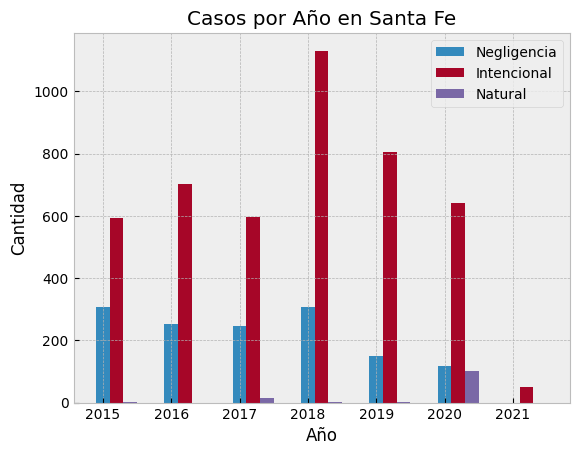

In [82]:
x_values = santa_fe['anio']
y_values_negligencia = santa_fe['negligencia']
y_values_intencional = santa_fe['intencional']
y_values_natural = santa_fe['natural']

# Primera barra para negligencia
plt.bar(x_values, y_values_negligencia, width=0.2, label='Negligencia', align='center')

# Segunda barra para intencional
plt.bar([x + 0.2 for x in x_values], y_values_intencional, width=0.2, label='Intencional', align='center')

# Tercera barra para natural
plt.bar([x + 0.4 for x in x_values], y_values_natural, width=0.2, label='Natural', align='center')

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Casos por Año en Santa Fe')
plt.legend()  # Mostrar la leyenda para identificar las variables
plt.show()

5. Obtenga el número promedio de incendios intencionales, por negligencia y naturales para la
provincia de Río Negro durante el periodo 1993-2021.

In [84]:
rio_negro=data[(data['provincia']=='Río Negro') & (data['anio']>=1993) & (data['anio']<=2021)]
rio_negro

,anio,provincia,total,negligencia,intencional,natural,desconocida
14,1993,Río Negro,36,36,0,0.0,0
37,1994,Río Negro,258,251,7,0.0,0
60,1995,Río Negro,418,168,250,0.0,0
83,1996,Río Negro,361,73,11,27.0,250
105,1997,Río Negro,700,245,453,2.0,0
128,1998,Río Negro,1197,185,520,26.0,466
150,1999,Río Negro,902,518,118,8.0,258
174,2000,Río Negro,1143,741,144,24.0,234
198,2001,Río Negro,1836,542,161,222.0,911
221,2002,Río Negro,1952,510,97,63.0,1282


In [87]:
rio_negro[["negligencia","intencional","natural"]].mean()

,0
negligencia,240.965517
intencional,343.758621
natural,18.896552
